In [40]:
import numpy as np
from queue import PriorityQueue
from astar_utils import get_neighbor_nodes, exceed_board, reconstruct_path
from astar_utils import load_board, plot_board, create_video_from_frames

define heuristic function $h(n)$ as a Manhattan distance between two points.

In [41]:
def heuristic_func(xy0, xy1):
    h = abs(xy0[0] - xy1[0]) + abs(xy0[1] - xy1[1])
    return h

Load maze. Define moves, starting node, target node.

In [42]:
board = load_board('maze/2.png')
XY_WALLS = tuple(zip(*np.where(board==np.inf))) # walls
DIRECTION_MOVES = [(0,1), (0,-1), (-1,0), (1, 0)] # down, up, left, right
XY_STARTING = (4, 3)  # starting node
XY_TARGET = (5, 7)  # target node

maze is plot along with starting and target node.

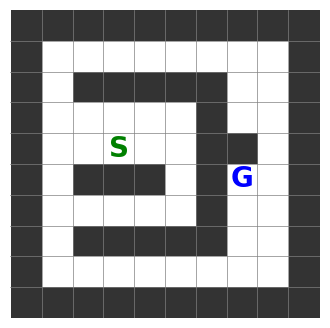

In [43]:
plot_board(board, None, XY_STARTING, XY_TARGET)

A* algoritm is here:

In [49]:
frames = [] # to create an animation.

G = board.copy() # table storing actual cost g(n)
F = board.copy() # table storing f(n) = g(n) + h(n)
G[XY_STARTING] = 0
F[XY_STARTING] = G[XY_STARTING] + heuristic_func(XY_STARTING, XY_TARGET)

current_node = XY_STARTING
frontier = PriorityQueue()
frontier.put((F[XY_STARTING], XY_STARTING))
explored_set = set()
came_from = {}
bestPath = None
while not frontier.empty():    
    # comment this out if do not want to create a video.
    frame = plot_board(F, current_node, XY_STARTING, XY_TARGET, frontier, return_frame=True)
    frames.append(frame)
    
    cost, current_node = frontier.get() # get the node with lowest f(n) and remove it from the queue.
    explored_set.add(current_node)
    
    if current_node == XY_TARGET:
        bestPath = reconstruct_path(came_from, XY_STARTING, XY_TARGET)
        frame = plot_board(F, current_node, XY_STARTING, XY_TARGET, frontier, bestPath, return_frame=True)
        frames.append(frame)
        break
    child_nodes = get_neighbor_nodes(current_node, DIRECTION_MOVES)
    for child in child_nodes:
        if exceed_board(child, board.shape) or (child in XY_WALLS) or (child in explored_set):
            continue
        G[child] = G[current_node] + 1 # cost 1 point per move.
        h = heuristic_func(child, XY_TARGET)
        f = G[child] + h*1.1
        if f < F[child]:
            F[child] = f
            frontier.put((f, child))
            came_from[child] = current_node

exporting as video.. this may not work if you do not have the codec.

In [50]:
import cv2
from IPython.display import Video
import os

output_filename = 'maze_search.mp4'
fps = 2
frame_size = frame.shape[:-1]
fourcc = cv2.VideoWriter_fourcc(*'avc1')

out = cv2.VideoWriter(output_filename, fourcc, fps, frame_size)

for frame in frames:
    frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    out.write(frame_bgr)
out.release()

animation

In [51]:
output_filename = 'maze_search.mp4'
video_path = os.path.abspath(output_filename)
Video(video_path, width=640, height=360, embed=True)

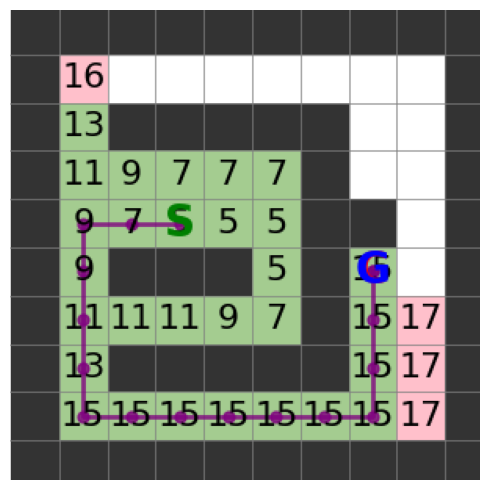

In [54]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.imshow(frames[-1])
axes.set_xlim(50, 350)
axes.set_ylim(350, 50)
axes.axis('off')
plt.tight_layout()

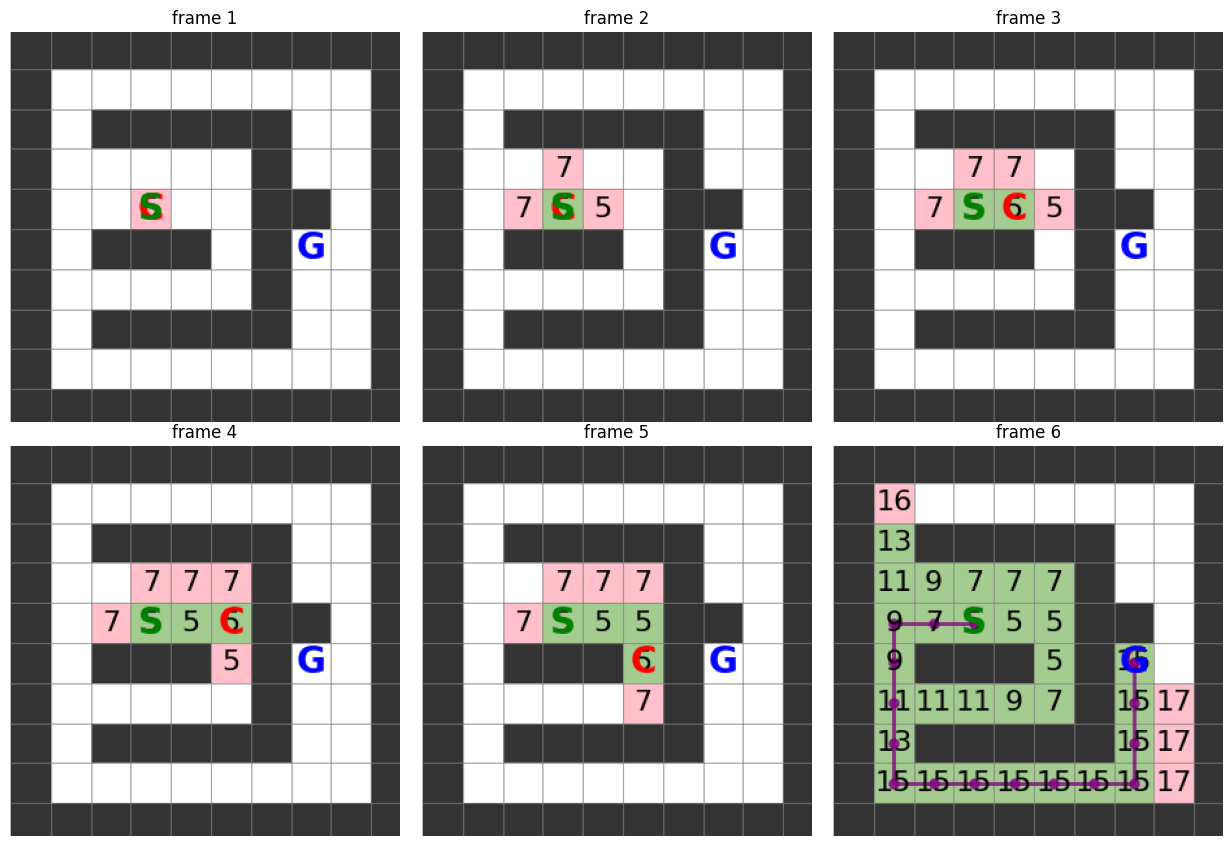

In [53]:
import matplotlib.pyplot as plt
frame_indices = [0, 1, 2, 3, 4, -1]
fig, axes = plt.subplots(2, 3, figsize=(12.5, 8.5))
axes = axes.ravel()
for i, i_frame in enumerate(frame_indices):
    axes[i].imshow(frames[i_frame])
    axes[i].set_xlim(50, 350)
    axes[i].set_ylim(350, 50)
    axes[i].axis('off')
    axes[i].set_title(f'frame {i+1}')
plt.tight_layout()